# TASK \#7 - Stock Market Prediction using Numerical and Textual Analysis
(Level - Advanced)

Objective: Create a hybrid model for stock price performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

# **Name : AasimBaig Mirza**

In [ ]:
!pip install -q pmdarima

     |████████████████████████████████| 1.5MB 29.3MB/s 
     |████████████████████████████████| 9.5MB 20.8MB/s 


In [ ]:
# import libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# arima model imports
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

# STOCK DATA LOADING AND VISUALIZATION

In [ ]:
stock_data = pd.read_csv("/content/drive/MyDrive/bse_hist.csv")
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,0,0,0
1,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,0,0,0
2,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,0,0,0
3,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,0,0,0
4,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,0,0,0


In [ ]:
stock_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,5864.0,16898.982397,12177.575464,2621.889893,4822.140137,16218.080078,26288.887207,5.240003e+04
High,5864.0,17003.136946,12226.454140,2682.590088,4873.117432,16332.314941,26435.632812,5.251676e+04
Low,5864.0,16760.125730,12096.542366,2594.870117,4765.117554,16054.399902,26126.602051,5.188646e+04
Close,5864.0,16879.087361,12160.163732,2600.120117,4817.495117,16202.544922,26266.892578,5.215413e+04
Volume,5864.0,67566.678035,977805.240193,0.000000,0.000000,12200.000000,19200.000000,3.181510e+07
Dividends,5864.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Stock Splits,5864.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5864 entries, 0 to 5863
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5864 non-null   object 
 1   Open          5864 non-null   float64
 2   High          5864 non-null   float64
 3   Low           5864 non-null   float64
 4   Close         5864 non-null   float64
 5   Volume        5864 non-null   int64  
 6   Dividends     5864 non-null   int64  
 7   Stock Splits  5864 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 366.6+ KB


In [ ]:
# converting object datatype to datetime
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
# dropping unnecessary columns
stock_data.drop(columns=['Dividends', 'Stock Splits'],inplace=True, axis=1)
# drop null or na values
stock_data.dropna(inplace = True)
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5864 entries, 0 to 5863
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5864 non-null   datetime64[ns]
 1   Open    5864 non-null   float64       
 2   High    5864 non-null   float64       
 3   Low     5864 non-null   float64       
 4   Close   5864 non-null   float64       
 5   Volume  5864 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 320.7 KB


Text(0.5, 1.0, 'Closing Price of BSE')

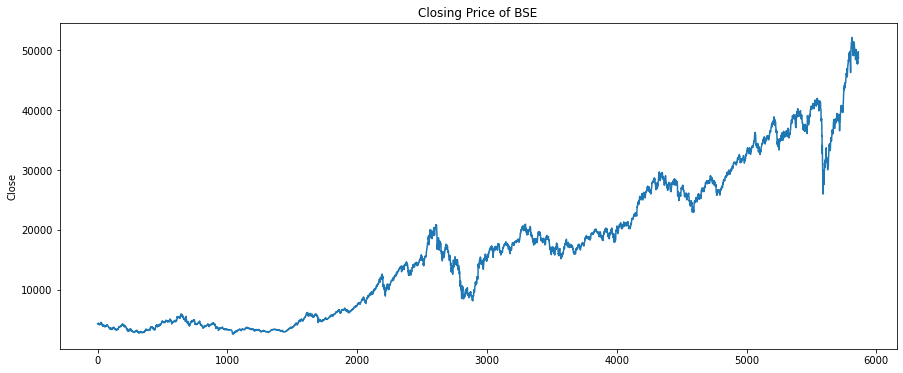

In [ ]:
# historical view of closing price
plt.figure(figsize=(15, 6))
stock_data["Close"].plot()
plt.ylabel("Close")
plt.xlabel(None)
plt.title("Closing Price of BSE")

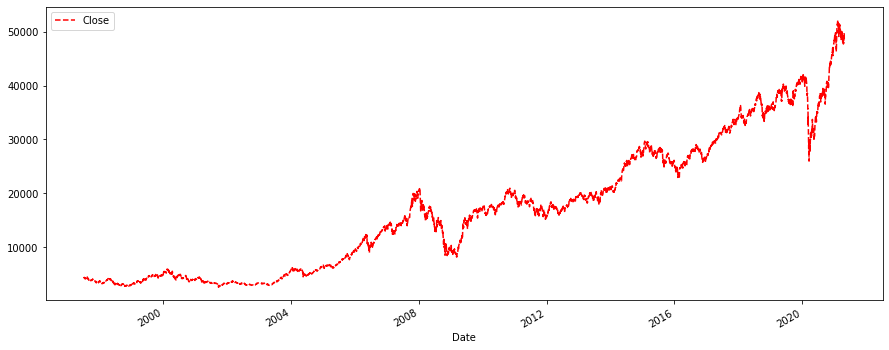

In [ ]:
# plotting stock between specified time
stock_data.plot(x="Date", y="Close", legend=True,figsize=(15, 6), ls='--',c='red')

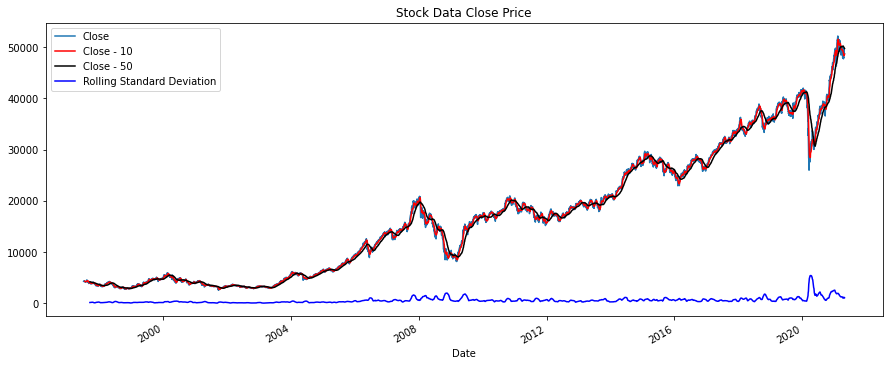

In [ ]:
# Moving Average for Stockdata.
stock_data['close_10']=stock_data['Close'].rolling(10).mean()
stock_data['close_50']=stock_data['Close'].rolling(50).mean()
stock_data['close_50_std'] = stock_data['Close'].rolling(50).std()

ax=stock_data.plot(x='Date',y='Close',title='Stock Data Close Price',figsize=(15,6))
stock_data.plot(x='Date',y='close_10',label = 'Close - 10',color='red',ax=ax)
stock_data.plot(x='Date',y='close_50',label = 'Close - 50',color='k',ax=ax)
stock_data.plot(x='Date', y='close_50_std',label = 'Rolling Standard Deviation',color='b',ax=ax)

plt.ioff()

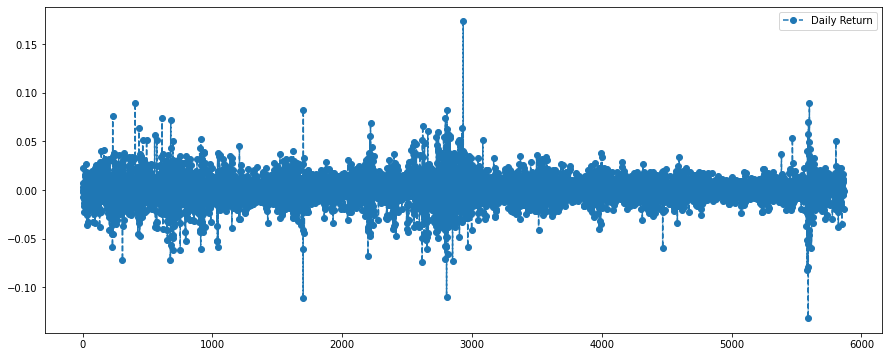

In [ ]:
# Daily Returns
stock_data['Daily Return']=stock_data['Close'].pct_change()
stock_data['Daily Return'].plot(figsize=(15,6),legend=True,linestyle='--',marker='o')

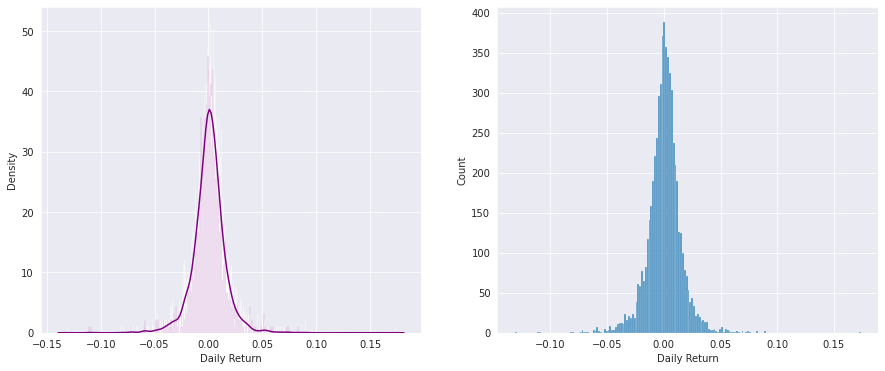

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

f,ax=plt.subplots(1,2,figsize=(15,6))
k1=sns.distplot(stock_data['Daily Return'].dropna(),bins=2000,color='purple',ax=ax[0])
k2=sns.histplot(data=stock_data, x="Daily Return",ax=ax[1])
plt.show()

In [ ]:
def rollingMeanPlot(data):
    #Determing rolling statistics
    rollmean = data.rolling(20).mean()
    rollstd = data.rolling(20).std()

    #Plot rolling statistics:
    plt.figure(figsize = (15,6))
    plt.plot(data, color = 'red', label = 'Original')
    plt.plot(rollmean, color = 'y', label = 'Rolling mean')
    plt.plot(rollstd, color = 'b', label = 'Rolling std')
    plt.xlabel('Date')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation',  fontsize = 15)
    plt.show(block = False)


def dickeyFullerTest(data):
    print('Results of Dickey Fuller Test')
    result = adfuller(data, autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary ")

In [ ]:
# Create a new dataframe with only the 'Close column 
data = stock_data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * 0.90 ))
print(training_data_len)

5278


In [ ]:
train = data[:training_data_len]
test = data[training_data_len:]

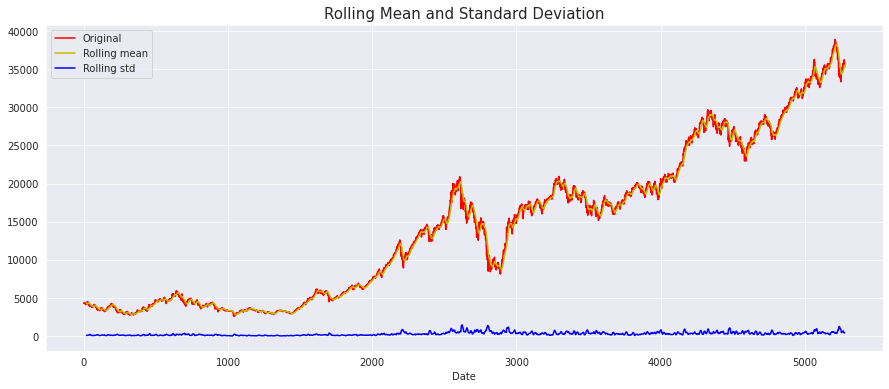

Results of Dickey Fuller Test
ADF Test Statistic : 0.3946939443713897
p-value : 0.9812954264558998
#Lags Used : 14
Number of Observations Used : 5263
Weak evidence against null hypothesis, time series is non-stationary 


In [ ]:
rollingMeanPlot(train["Close"])
dickeyFullerTest(train["Close"])

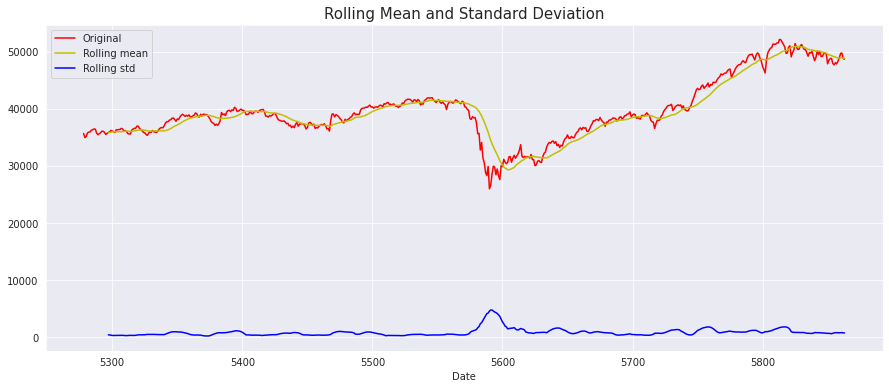

Results of Dickey Fuller Test
ADF Test Statistic : -0.9325504022789043
p-value : 0.7770642333848108
#Lags Used : 7
Number of Observations Used : 578
Weak evidence against null hypothesis, time series is non-stationary 


In [ ]:
rollingMeanPlot(test["Close"])
dickeyFullerTest(test["Close"])

In [ ]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(20).mean()

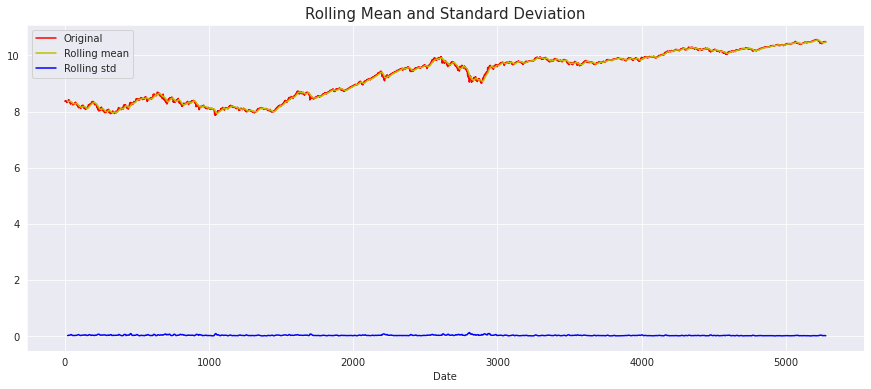

Results of Dickey Fuller Test
ADF Test Statistic : -0.37765061222580754
p-value : 0.9137639810031775
#Lags Used : 23
Number of Observations Used : 5254
Weak evidence against null hypothesis, time series is non-stationary 


In [ ]:
rollingMeanPlot(train_log)
dickeyFullerTest(train_log)

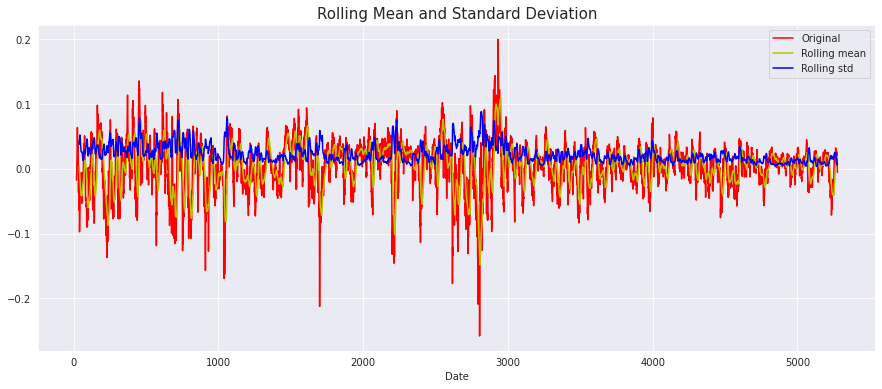

Results of Dickey Fuller Test
ADF Test Statistic : -11.875178014456575
p-value : 6.3658623949287805e-22
#Lags Used : 23
Number of Observations Used : 5235
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

rollingMeanPlot(train_log_diff)
dickeyFullerTest(train_log_diff)

# ARIMA MODEL 

In [ ]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-29337.689, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-29303.854, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-29331.610, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-29334.222, Time=1.82 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-29302.150, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-29337.484, Time=2.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-29337.794, Time=1.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-29336.920, Time=0.92 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-29339.763, Time=1.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-29337.804, Time=0.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-29335.811, Time=1.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-29338.288, Time=0.32 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 12.268 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5278
Model:               SARIMAX(2, 1, 0)   Log Likelihood               14673.882
Date:                Sun, 16 May 2021   AIC                         -29339.763
Time:                        03:28:46   BIC                         -29313.479
Sample:                             0   HQIC                        -29330.576
                               - 5278                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.000      1.822      0.068    -2.9e-05       0.001
ar.L1          0.0783      0.008      9.265      0.000       0.062       0.095
ar.L2         -0.0439      0.009     -4.827      0.000      -0.062      -0.026
sigma2         0.0002   2.15e-06    104.835      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9280.66
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

[]

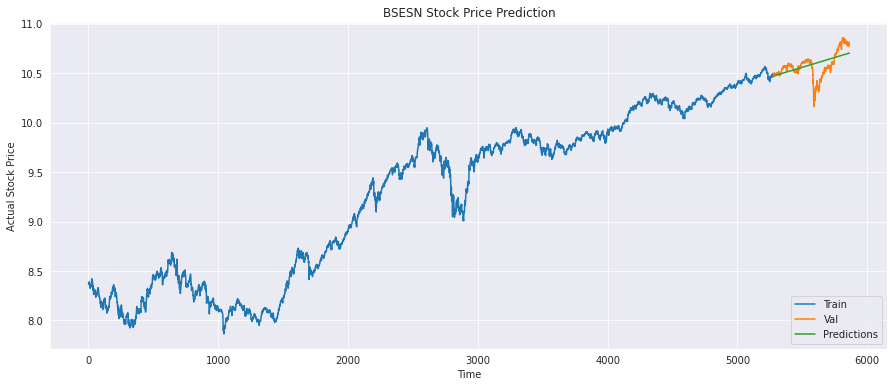

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.plot()

In [ ]:
#Calculating error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.11083891174579712


In [ ]:
from sklearn.metrics import r2_score
r2score = r2_score(test_log, predictions)
print("R2 Score", r2score)

R2 Score 0.2657612878010883


# LSTM MODEL

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

training_data_len = int(np.ceil( len(dataset) * 0.90 ))
print(training_data_len)

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 60: , :]

5278


In [ ]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(5218, 60, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(64))
model.add(Dropout(0.2))

model.add(Dense(1))

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


# Save weights only for best model
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', 
                               verbose = 2,
                               monitor="loss",
                               save_best_only = True)


# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=5, callbacks=[checkpointer])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 64)            16896     
_________________________________________________________________
dropout (Dropout)            (None, 60, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 64)            33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [ ]:
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rms = np.sqrt(mean_squared_error(y_test,predictions))
print("RMSE - ", rms)

r2score = r2_score(y_test, predictions)
print("R2 Score - ", r2score)

RMSE -  2442.859646744354
R2 Score -  0.7786025272894722


[]

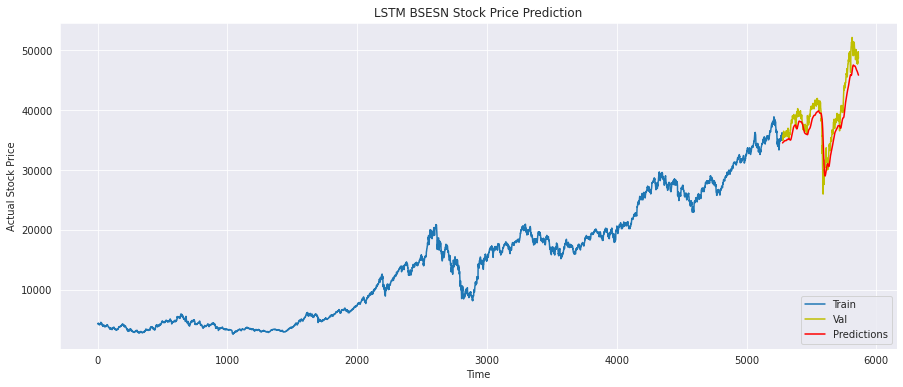

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
predictions = pd.DataFrame(predictions,index = valid.index,columns=['Prediction'])

plt.figure(figsize = (15,6))
plt.plot(train, label='Train')
plt.plot(valid, label='Test', color='y')
plt.plot(predictions, label='Prediction', color='r')
plt.title('LSTM BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.plot()

# Sentiment Analysis

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/india-news-headlines.csv")

In [ ]:
# Data cleaning
data=data[['publish_date','headline_text']].drop_duplicates()
data['Date']=pd.to_datetime(data['publish_date'],format="%Y%m%d")
data['year']=data['Date'].dt.year

In [ ]:
data.drop(columns=["publish_date"], axis=1, inplace=True)

In [ ]:
#Grouping the headlines for each day
data = data.drop_duplicates(subset='Date', keep='first', inplace=False) 
data.reset_index(inplace = True, drop = True)
data.shape

(7262, 3)

In [ ]:
display(data.head())
display(data.tail())

,headline_text,Date,year
0,Status quo will not be disturbed at Ayodhya; s...,2001-01-02,2001
1,Powerless north India gropes in the dark,2001-01-03,2001
2,The string that pulled Stephen Hawking to India,2001-01-04,2001
3,Light combat craft takes India into club class,2001-01-05,2001
4,Light combat craft takes India into club class,2001-01-06,2001


,headline_text,Date,year
7257,#BigInterview! Dhritiman Chatterjee: Nobody da...,2020-12-27,2020
7258,Horoscope Today; 28 December 2020: Check astro...,2020-12-28,2020
7259,Man recovers charred remains of 'thief' from h...,2020-12-29,2020
7260,Numerology Readings 30 December 2020: Predicti...,2020-12-30,2020
7261,Horoscope Today; 31 December 2020: Check astro...,2020-12-31,2020


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7262 entries, 0 to 7261
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   headline_text  7262 non-null   object        
 1   Date           7262 non-null   datetime64[ns]
 2   year           7262 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 170.3+ KB


In [ ]:
#Cleaning headlines
ps = PorterStemmer()
clean = []
for i in range(0,len(data['headline_text'])):
    headlines = re.sub('[^a-zA-Z]',' ',data['headline_text'][i])
    headlines = headlines.lower()
    headlines = headlines.split()
    headlines = [ps.stem(word) for word in headlines if not word in set(stopwords.words('english'))]
    headlines=' '.join(headlines)
    clean.append(headlines)
data['headline_text'] = pd.Series(clean)
data.head()

,headline_text,Date,year
0,statu quo disturb ayodhya say vajpaye,2001-01-02,2001
1,powerless north india grope dark,2001-01-03,2001
2,string pull stephen hawk india,2001-01-04,2001
3,light combat craft take india club class,2001-01-05,2001
4,light combat craft take india club class,2001-01-06,2001


In [ ]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

#Adding subjectivity and polarity colmns
data['Subjectivity'] = data['headline_text'].apply(getSubjectivity)
data['Polarity'] = data['headline_text'].apply(getPolarity)
data.head()

,headline_text,Date,year,Subjectivity,Polarity
0,statu quo disturb ayodhya say vajpaye,2001-01-02,2001,0.00,0.000
1,powerless north india grope dark,2001-01-03,2001,0.65,-0.325
2,string pull stephen hawk india,2001-01-04,2001,0.00,0.000
3,light combat craft take india club class,2001-01-05,2001,0.70,0.400
4,light combat craft take india club class,2001-01-06,2001,0.70,0.400


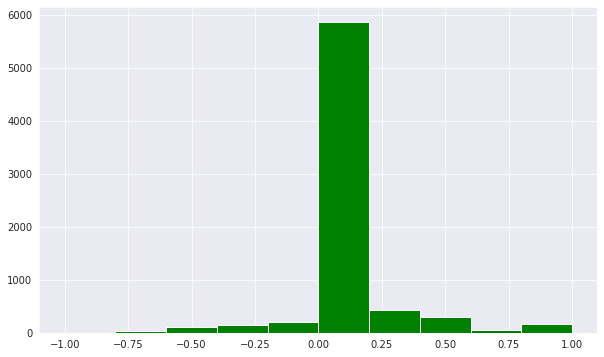

In [ ]:
plt.figure(figsize = (10,6))
data['Polarity'].hist(color = 'g')

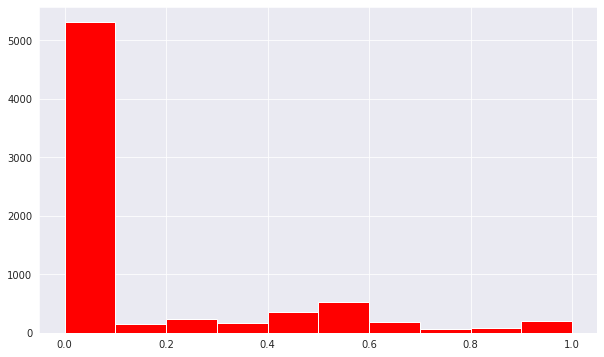

In [ ]:
plt.figure(figsize = (10,6))
data['Subjectivity'].hist(color = 'r')

In [ ]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

data['Compound'] = [sia.polarity_scores(v)['compound'] for v in data['headline_text']]
data['Negative'] = [sia.polarity_scores(v)['neg'] for v in data['headline_text']]
data['Neutral'] = [sia.polarity_scores(v)['neu'] for v in data['headline_text']]
data['Positive'] = [sia.polarity_scores(v)['pos'] for v in data['headline_text']]
data


,headline_text,Date,year,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,statu quo disturb ayodhya say vajpaye,2001-01-02,2001,0.000000,0.000000,-0.4019,0.351,0.649,0.00
1,powerless north india grope dark,2001-01-03,2001,0.650000,-0.325000,-0.4939,0.444,0.556,0.00
2,string pull stephen hawk india,2001-01-04,2001,0.000000,0.000000,0.0000,0.000,1.000,0.00
3,light combat craft take india club class,2001-01-05,2001,0.700000,0.400000,-0.3400,0.286,0.714,0.00
4,light combat craft take india club class,2001-01-06,2001,0.700000,0.400000,-0.3400,0.286,0.714,0.00
...,...,...,...,...,...,...,...,...,...
7257,biginterview dhritiman chatterje nobodi dare m...,2020-12-27,2020,0.541667,-0.291667,-0.1027,0.135,0.865,0.00
7258,horoscop today decemb check astrolog predict a...,2020-12-28,2020,0.000000,0.000000,-0.6597,0.306,0.694,0.00
7259,man recov char remain thief burnt shop dump be...,2020-12-29,2020,0.000000,0.000000,-0.7184,0.429,0.571,0.00
7260,numerolog read decemb predict lucki colour luc...,2020-12-30,2020,0.000000,0.000000,0.0772,0.000,0.860,0.14


In [ ]:
stock_data.tail()

,Date,Open,High,Low,Close,Volume,close_10,close_50,close_50_std,Daily Return
5859,2021-04-27,48424.078125,49009.261719,48399.531250,48944.140625,10100,48300.814453,49909.804219,1174.513418,0.011524
5860,2021-04-28,49066.640625,49801.480469,49066.640625,49733.839844,14300,48485.860547,49878.293203,1157.205297,0.016135
5861,2021-04-29,50093.859375,50375.769531,49535.980469,49765.941406,13200,48608.048828,49842.981641,1132.400387,0.000645
5862,2021-04-30,49360.890625,49569.421875,48698.078125,48782.359375,19400,48605.916797,49787.742813,1114.945478,-0.019764
5863,2021-05-03,48356.011719,48863.230469,48028.070312,48718.519531,0,48594.565625,49719.030625,1071.137623,-0.001309


In [ ]:
data_merge = pd.merge(stock_data, data, how='inner', on='Date')
data_merge

,Date,Open,High,Low,Close,Volume,close_10,close_50,close_50_std,Daily Return,headline_text,year,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,0,3997.702002,3958.058813,159.572003,0.011772,statu quo disturb ayodhya say vajpaye,2001,0.00,0.000,-0.4019,0.351,0.649,0.00
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0,3986.764990,3965.404214,155.511503,0.010237,powerless north india grope dark,2001,0.65,-0.325,-0.4939,0.444,0.556,0.00
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0,3983.008008,3975.321016,148.664204,0.013633,string pull stephen hawk india,2001,0.00,0.000,0.0000,0.000,1.000,0.00
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0,3992.740015,3985.955815,144.008760,0.016611,light combat craft take india club class,2001,0.70,0.400,-0.3400,0.286,0.714,0.00
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,0,4001.360034,3993.492217,140.893625,-0.015130,sangh parivar babri panel ant,2001,0.00,0.000,0.0000,0.000,1.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,13700,46411.150781,43323.462734,2454.833251,0.011398,set mood sex cold winter,2020,1.00,-0.600,0.0000,0.000,1.000,0.00
4889,2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,9600,46536.624609,43454.642969,2491.915351,0.008094,horoscop today decemb check astrolog predict a...,2020,0.00,0.000,-0.6597,0.306,0.694,0.00
4890,2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,12800,46672.586328,43612.336328,2500.762642,0.005476,man recov char remain thief burnt shop dump be...,2020,0.00,0.000,-0.7184,0.429,0.571,0.00
4891,2020-12-30,47789.031250,47807.851562,47358.359375,47746.218750,15600,46820.891016,43767.601094,2511.801851,0.002796,numerolog read decemb predict lucki colour luc...,2020,0.00,0.000,0.0772,0.000,0.860,0.14


In [ ]:
df = data_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,4018.879883,0.00,0.000,-0.4019,0.351,0.649,0.00
1,4060.020020,0.65,-0.325,-0.4939,0.444,0.556,0.00
2,4115.370117,0.00,0.000,0.0000,0.000,1.000,0.00
3,4183.729980,0.70,0.400,-0.3400,0.286,0.714,0.00
4,4120.430176,0.00,0.000,0.0000,0.000,1.000,0.00
...,...,...,...,...,...,...,...
4888,46973.539062,1.00,-0.600,0.0000,0.000,1.000,0.00
4889,47353.750000,0.00,0.000,-0.6597,0.306,0.694,0.00
4890,47613.078125,0.00,0.000,-0.7184,0.429,0.571,0.00
4891,47746.218750,0.00,0.000,0.0772,0.000,0.860,0.14


# Hybrid Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.031422,0.00,0.444444,0.287514,0.351,0.649,0.0
1,0.032334,0.65,0.263889,0.237550,0.444,0.556,0.0
2,0.033559,0.00,0.444444,0.505784,0.000,1.000,0.0
3,0.035073,0.70,0.666667,0.321132,0.286,0.714,0.0
4,0.033672,0.00,0.444444,0.505784,0.000,1.000,0.0


In [ ]:
X = new_df.drop('Close', axis=1)
y = new_df['Close']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(3914, 6)

In [ ]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
283,0.000000,0.444444,0.505784,0.0,1.000,0.000
4421,0.200000,0.416667,0.505784,0.0,1.000,0.000
3247,0.000000,0.444444,0.505784,0.0,1.000,0.000
446,0.000000,0.444444,0.505784,0.0,1.000,0.000
4082,0.333333,0.537037,0.851681,0.0,0.323,0.677
2828,0.000000,0.444444,0.690436,0.0,0.676,0.324
1011,0.000000,0.444444,0.734698,0.0,0.000,1.000
641,0.200000,0.555556,0.654157,0.0,0.617,0.383
333,0.000000,0.444444,0.744963,0.0,0.408,0.592
33,0.400000,0.416667,0.505784,0.0,1.000,0.000


In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [ ]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.37002806 0.328407   0.328407   0.61368644 0.328407   0.328407
 0.26093347 0.328407   0.29271076 0.2980228 ]
1933    0.142335
3913    0.535071
1774    0.291250
4367    0.722850
148     0.001791
1461    0.249375
4569    0.765103
1999    0.123148
4264    0.727842
4058    0.651457
Name: Close, dtype: float64
0.06354458729877323


In [ ]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [ ]:
print(mean_squared_error(predictions, y_test))

0.0615580966386163


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [ ]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.18278624 0.32967139 0.32967139 0.65299838 0.32967139 0.32967139
 0.27040254 0.32967139 0.32462563 0.32365865]
1933    0.142335
3913    0.535071
1774    0.291250
4367    0.722850
148     0.001791
1461    0.249375
4569    0.765103
1999    0.123148
4264    0.727842
4058    0.651457
Name: Close, dtype: float64
0.072027813514166


In [ ]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
predictions = lgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.061528241800347404


In [ ]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

[03:29:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.060306975705810034


In [ ]:
THANKYOU FOR GRIP TO GIVING ME OPPURTU